Importing Required Libraries



In [3]:
import requests
import bs4
from bs4 import BeautifulSoup as bs
import pandas as pd

In [4]:
# Created empty lists for all features of mobiles available in Flipkart

brand_model=[]
ram_and_storage=[]
display=[]
camera=[]
battery=[]
processors=[]
price=[]
rating=[]

Extracting the data from Flipkart Website using html Parser and appending data to lists created above

In [5]:
# Creating a loop for all the pages in Flipkart Android mobiles

pages=list(range(1,223))
for page in pages:
    req=requests.get("https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_HistoryAutoSuggest_1_7_na_na_na&otracker1=AS_Query_HistoryAutoSuggest_1_7_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=1ef0e3f5-2ba7-42b3-89d4-70a2b590a60e&as-searchtext=mobiles&sort=popularity&p%5B%5D=facets.operating_system%255B%255D%3DAndroid&page={}".format(page)).text
    soup=bs(req,'html.parser')

    count=0

    for all in soup.findAll('a',class_='_1fQZEK'):
      description=all.find('div',attrs={'class':'_4rR01T'})
      cost=all.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
      rate=all.find('div',attrs={'class':'_3LWZlK'})
      specification=all.find('div',attrs={'class':'fMghEO'})
      for c in specification:
        try:
          c=c.find_all('li', attrs={'class':'rgWa7D'})
          ram=c[0].text
          screen=c[1].text
          cam=c[2].text
          mah=c[3].text
          proc=c[4].text
          brand_model.append(description.text)
          price.append(cost.text)
          ram_and_storage.append(ram)
          display.append(screen)
          camera.append(cam)
          battery.append(mah)
          processors.append(proc)
          rating.append(rate.text)
        except:
          pass
          count=count+1

In [6]:
print(len(brand_model))
print(len(ram_and_storage))
print(len(display))
print(len(camera))
print(len(battery))
print(len(processors))
print(len(price))
print(len(rating))

984
983
983
983
983
983
983
967


In [7]:
# Taking the minimum length of all features to maintain the consistency

n=min([len(brand_model),len(ram_and_storage),len(display),len(camera),len(battery),len(processors),len(price),len(rating)])
print(n)

967


In [8]:
# Creating the dataframe indexing each column to minimum length

df=pd.DataFrame({'Model': brand_model[:n],'Ram,Rom,Storage':ram_and_storage[:n],'Screen Size':display[:n],'Camera':camera[:n],'Battery':battery[:n],'Processor':processors[:n],'Price':price[:n],'Rating':rating[:n]})

In [9]:
df.head(10)

,Model,"Ram,Rom,Storage",Screen Size,Camera,Battery,Processor,Price,Rating
0,"OPPO K10 (Blue Flame, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,"₹13,990",4.4
1,"OPPO K10 (Black Carbon, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,"₹13,990",4.4
2,"POCO C31 (Royal Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,MediaTek G35 Processor,"₹7,999",4.3
3,"SAMSUNG Galaxy F22 (Denim Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,"₹12,499",4.3
4,"realme 9 (Stargaze White, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.26 cm (6.4 inch) Full HD+ AMOLED Display,108MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,"₹14,999",4.4
5,"realme 9 (Meteor Black, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 256 GB,16.26 cm (6.4 inch) Full HD+ AMOLED Display,108MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,"₹14,999",4.4
6,"vivo T1X (Gravity Black, 64 GB)",4 GB RAM | 64 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 680 Processor,"₹11,999",4.5
7,"vivo T1X (Space Blue, 64 GB)",4 GB RAM | 64 GB ROM,16.71 cm (6.58 inch) Full HD+ Display,50MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 680 Processor,"₹11,999",4.5
8,"SAMSUNG Galaxy F22 (Denim Blue, 128 GB)",6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,"₹12,499",4.3
9,"realme C30s (Stripe Blue, 32 GB)",2 GB RAM | 32 GB ROM | Expandable Upto 1 TB,16.51 cm (6.5 inch) HD+ Display,8MP Rear Camera | 5MP Front Camera,5000 mAh Lithium Ion Battery,Unisoc SC9863A/ Unisoc SC9863A1 Processor,"₹6,999",4.3


In [10]:
df['Ram,Rom,Storage'].str.split('|', expand=True)

,0,1,2
0,6 GB RAM,128 GB ROM,Expandable Upto 1 TB
1,6 GB RAM,128 GB ROM,Expandable Upto 1 TB
2,4 GB RAM,64 GB ROM,Expandable Upto 512 GB
3,6 GB RAM,128 GB ROM,Expandable Upto 1 TB
4,6 GB RAM,128 GB ROM,Expandable Upto 256 GB
...,...,...,...
962,8 GB RAM,128 GB ROM,Expandable Upto 1 TB
963,8 GB RAM,128 GB ROM,Expandable Upto 512 GB
964,8 GB RAM,128 GB ROM,Expandable Upto 512 GB
965,8 GB RAM,128 GB ROM,None


In [11]:
# Splitting up combined feature column to separate columns

df[['Ram','Rom','Expandable']] = df['Ram,Rom,Storage'].str.split('|',expand=True)

In [12]:
# Dropping the combined feature column

df.drop('Ram,Rom,Storage', axis=1, inplace=True)

In [13]:
df

,Model,Screen Size,Camera,Battery,Processor,Price,Rating,Ram,Rom,Expandable
0,"OPPO K10 (Blue Flame, 128 GB)",16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,"₹13,990",4.4,6 GB RAM,128 GB ROM,Expandable Upto 1 TB
1,"OPPO K10 (Black Carbon, 128 GB)",16.74 cm (6.59 inch) Full HD+ Display,50MP + 2MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,"₹13,990",4.4,6 GB RAM,128 GB ROM,Expandable Upto 1 TB
2,"POCO C31 (Royal Blue, 64 GB)",16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,MediaTek G35 Processor,"₹7,999",4.3,4 GB RAM,64 GB ROM,Expandable Upto 512 GB
3,"SAMSUNG Galaxy F22 (Denim Black, 128 GB)",16.26 cm (6.4 inch) HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,6000 mAh Lithium-ion Battery,MediaTek Helio G80 Processor,"₹12,499",4.3,6 GB RAM,128 GB ROM,Expandable Upto 1 TB
4,"realme 9 (Stargaze White, 128 GB)",16.26 cm (6.4 inch) Full HD+ AMOLED Display,108MP + 8MP + 2MP | 16MP Front Camera,5000 mAh Lithium Ion Battery,Qualcomm Snapdragon 680 Processor,"₹14,999",4.4,6 GB RAM,128 GB ROM,Expandable Upto 256 GB
...,...,...,...,...,...,...,...,...,...,...
962,"SAMSUNG Galaxy S22 5G (Green, 128 GB)",16.94 cm (6.67 inch) Full HD+ AMOLED Display,108MP + 8MP + 2MP | 16MP Front Camera,4500 mAh Li-Polymer Battery,Mediatek Dimensity 920 Processor,"₹27,999",4.5,8 GB RAM,128 GB ROM,Expandable Upto 1 TB
963,"Xiaomi 11i Hypercharge 5G (Camo Green, 128 GB)",16.94 cm (6.67 inch) Full HD+ Display,64MP + 13MP + 2MP + 2MP | 20MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 732G Processor,"₹18,999",4.4,8 GB RAM,128 GB ROM,Expandable Upto 512 GB
964,"POCO X3 (Cobalt Blue, 128 GB)",16.94 cm (6.67 inch) Full HD+ Display,64MP + 13MP + 2MP + 2MP | 20MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 732G Processor,"₹18,999",4.3,8 GB RAM,128 GB ROM,Expandable Upto 512 GB
965,"POCO X3 (Shadow Gray, 128 GB)",16.81 cm (6.62 inch) Display,48MP Rear Camera,4400 mAh Battery,1 Year,"₹31,990",4.3,8 GB RAM,128 GB ROM,None


# In the same way, required columns like brand, processor, display features can be extracted and data types can be changed using pandas.

# Alternately i am exporting the dataframe as csv file and working on data clearning using Power Query in Excel.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Model        967 non-null    object
 1   Screen Size  967 non-null    object
 2   Camera       967 non-null    object
 3   Battery      967 non-null    object
 4   Processor    967 non-null    object
 5   Price        967 non-null    object
 6   Rating       967 non-null    object
 7   Ram          967 non-null    object
 8   Rom          967 non-null    object
 9   Expandable   626 non-null    object
dtypes: object(10)
memory usage: 75.7+ KB


In [15]:
df.describe()

,Model,Screen Size,Camera,Battery,Processor,Price,Rating,Ram,Rom,Expandable
count,967,967,967,967,967,967,967,967,967,626
unique,789,72,143,68,154,285,13,7,10,7
top,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",16.51 cm (6.5 inch) HD+ Display,50MP Rear Camera,5000 mAh Battery,Qualcomm Snapdragon 680 Processor,"₹9,999",4.3,4 GB RAM,128 GB ROM,Expandable Upto 1 TB
freq,6,90,53,239,47,35,329,309,283,274


In [16]:
df.to_csv('Raw Data.csv')

Importing Clean Data

In [17]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned Data_Flipkart Mobile.csv to Cleaned Data_Flipkart Mobile.csv


In [18]:
data=pd.read_csv("Cleaned Data_Flipkart Mobile.csv")

In [19]:
data

,Brand,Model,Processor,Ram,ROM,Screen Size,Display Type,Rear Camera,Front Camera,Battery(mah),Expandable Storage,Price,Rating
0,realme,"realme 9 (Sunburst Gold, 128 GB)",Qualcomm Snapdragon 680 Processor,6 GB RAM,128 GB ROM,6.4 inch,Full HD+ AMOLED Display,108MP + 8MP + 2MP,16MP Front Camera,5000,256 GB,16999,4.4
1,OPPO,"OPPO K10 (Blue Flame, 128 GB)",Qualcomm Snapdragon 680 Processor,6 GB RAM,128 GB ROM,6.59 inch,Full HD+ Display,50MP + 2MP + 2MP,16MP Front Camera,5000,1 TB,13990,4.4
2,OPPO,"OPPO K10 (Black Carbon, 128 GB)",Qualcomm Snapdragon 680 Processor,6 GB RAM,128 GB ROM,6.59 inch,Full HD+ Display,50MP + 2MP + 2MP,16MP Front Camera,5000,1 TB,13990,4.4
3,realme,"realme 9 (Meteor Black, 128 GB)",Qualcomm Snapdragon 680 Processor,6 GB RAM,128 GB ROM,6.4 inch,Full HD+ AMOLED Display,108MP + 8MP + 2MP,16MP Front Camera,5000,256 GB,16999,4.4
4,realme,"realme 9 (Stargaze White, 128 GB)",Qualcomm Snapdragon 680 Processor,6 GB RAM,128 GB ROM,6.4 inch,Full HD+ AMOLED Display,108MP + 8MP + 2MP,16MP Front Camera,5000,256 GB,16999,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,OPPO,"OPPO F21 Pro 5G (Rainbow Spectrum, 128 GB)",MediaTek Helio G96 Processor,6 GB RAM,64 GB ROM,6.95 inch,Full HD+ Display,50 MP + 2 MP Depth Lens + 2 MP Macro Lens,16MP Front Camera,5000,512 GB,13999,4.4
966,OPPO,"OPPO F21 Pro 5G (Cosmic Black, 128 GB)",MediaTek Dimensity 800U Processor,6 GB RAM,128 GB ROM,6.43 inch,Full HD+ Display,64MP + 8MP + 2MP,16MP Front Camera,4310,NaN,19999,4.3
967,Infinix,"Infinix Note 11s (Haze Green, 64 GB)",Exynos Octa Core Processor Processor,6 GB RAM,128 GB ROM,6.5 inch,Full HD+ Display,64MP + 12MP + 5MP + 5MP,32MP Front Camera,5000,1 TB,31999,4.1
968,realme,"realme X7 5G (Space Silver, 128 GB)",NaN,12 GB RAM,256 GB ROM,6.7 inch,Display,50MP Rear Camera,NaN,4500,NaN,39999,4.1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               970 non-null    object 
 1   Model               970 non-null    object 
 2   Processor           792 non-null    object 
 3   Ram                 970 non-null    object 
 4   ROM                 970 non-null    object 
 5   Screen Size         970 non-null    object 
 6   Display Type        970 non-null    object 
 7   Rear Camera         970 non-null    object 
 8   Front Camera        801 non-null    object 
 9   Battery(mah)        970 non-null    int64  
 10  Expandable Storage  623 non-null    object 
 11  Price               970 non-null    int64  
 12  Rating              970 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 98.6+ KB


In [21]:
data.describe()

,Battery(mah),Price,Rating
count,970.000000,970.000000,970.000000
mean,5011.613402,16867.055670,4.267938
std,479.058515,10359.785423,0.136418
min,50.000000,4789.000000,3.400000
25%,5000.000000,10499.000000,4.200000
50%,5000.000000,14499.000000,4.300000
75%,5000.000000,18499.000000,4.400000
max,7000.000000,84999.000000,4.800000


In [22]:
data.shape

(970, 13)

In [23]:
data.isnull().sum()

Brand                   0
Model                   0
Processor             178
Ram                     0
ROM                     0
Screen Size             0
Display Type            0
Rear Camera             0
Front Camera          169
Battery(mah)            0
Expandable Storage    347
Price                   0
Rating                  0
dtype: int64

#### Here Null values are nothing but NA, which was filled for unknown values, we cannot delete them, we leave them as it is

In [24]:
data.dtypes

Brand                  object
Model                  object
Processor              object
Ram                    object
ROM                    object
Screen Size            object
Display Type           object
Rear Camera            object
Front Camera           object
Battery(mah)            int64
Expandable Storage     object
Price                   int64
Rating                float64
dtype: object

#### Visualization Analysis

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

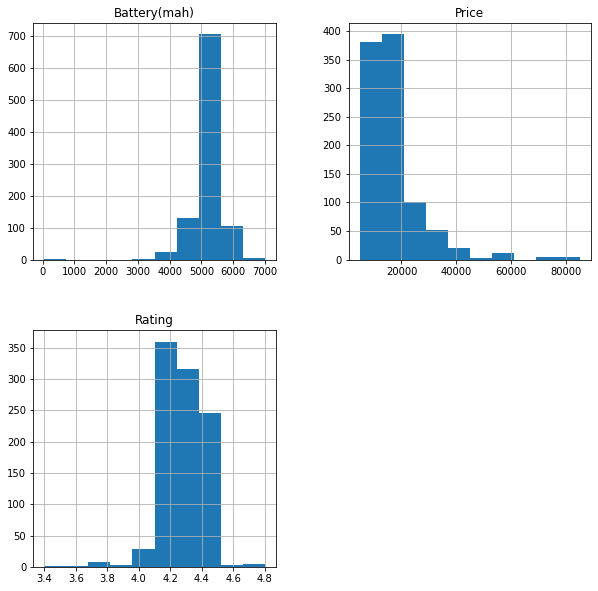

In [26]:
## To Know the spread of Numerical data types

data.hist(figsize=(10,10))
plt.show()

#### Analysis:  

1.   Most Android phones Battery capacity is around 5000mah
2.   80% of the phones available falls under 30K which is upper midrange
3.   Most mobile are rated around 4.2⭐



In [27]:
data['Brand'].unique()

array(['realme', 'OPPO', 'POCO', 'SAMSUNG', 'MOTOROLA', 'Infinix', 'vivo',
       'REDMI', 'Redmi', 'IQOO', 'Moto', 'Itel', 'Tecno', 'Google',
       'OnePlus', 'Realme', 'Xiaomi', 'Nothing', 'Mi', 'Maplin',
       'Micromax', 'LAVA', 'ASUS', 'GIONEE'], dtype=object)

### Distribution of Features and Price Ranges

---



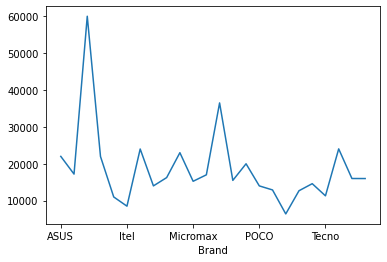

In [28]:
data.groupby('Brand')['Price'].median().plot()
plt.show()

In [29]:
# plt.figure(figsize=(12,5))
# sns.barplot(x=data['Brand'], y=data['Price'])
# plt.xticks(rotation=90)

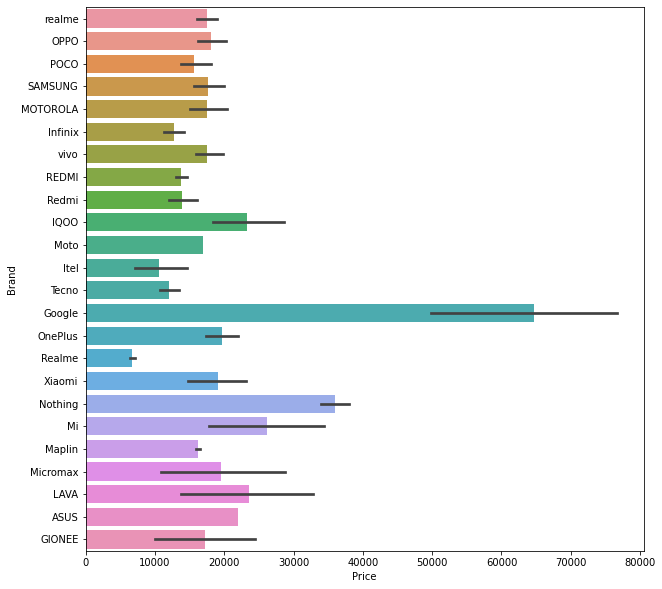

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x=data.Price, y=data.Brand)

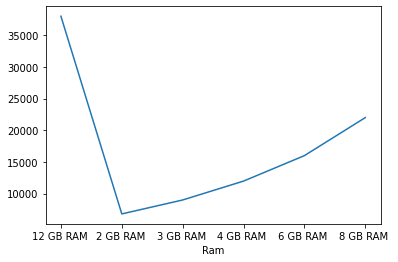

In [31]:
data.groupby('Ram')['Price'].median().plot()
plt.show()

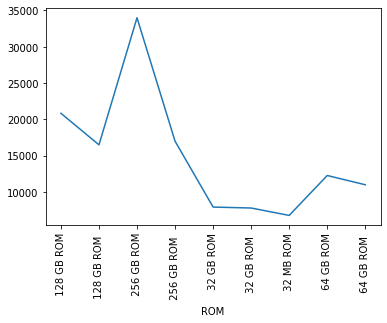

In [32]:
data.groupby('ROM')['Price'].median().plot()
plt.xticks(rotation=90)
plt.show()

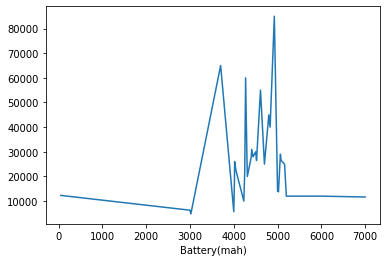

In [33]:
data.groupby('Battery(mah)')['Price'].median().plot()
plt.show()

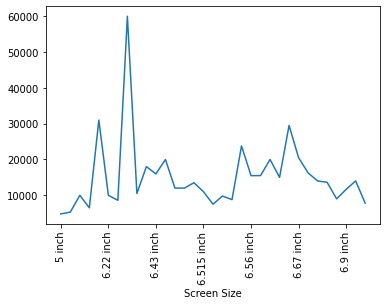

In [34]:
data.groupby('Screen Size')['Price'].median().plot()
plt.xticks(rotation=90)
plt.show()

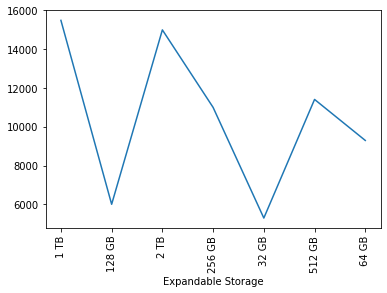

In [35]:
data.groupby('Expandable Storage')['Price'].median().plot()
plt.xticks(rotation=90)
plt.show()